In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the CSV data
try:
    data = np.genfromtxt('data/housing.csv', delimiter=',', dtype=float, skip_header=1)
except FileNotFoundError:
    print("Error: The file 'california_housing.csv' was not found.")

In [2]:
# column names from the header row 
with open('data/housing.csv', 'r') as f:
    column_names = f.readline().strip().split(',')

print(column_names)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [3]:
# Step 2: remove missing values or eda 
print("\nBasic information about numpy array:")
print("Shape:", data.shape)
print("Size:", data.size)
print("Number of dimensions:", data.ndim)
print("Item size:", data.itemsize)
print("Data type:", data.dtype)

print(data[:5])


Basic information about numpy array:
Shape: (20640, 10)
Size: 206400
Number of dimensions: 2
Item size: 8
Data type: float64
[[-1.2223e+02  3.7880e+01  4.1000e+01  8.8000e+02  1.2900e+02  3.2200e+02
   1.2600e+02  8.3252e+00  4.5260e+05         nan]
 [-1.2222e+02  3.7860e+01  2.1000e+01  7.0990e+03  1.1060e+03  2.4010e+03
   1.1380e+03  8.3014e+00  3.5850e+05         nan]
 [-1.2224e+02  3.7850e+01  5.2000e+01  1.4670e+03  1.9000e+02  4.9600e+02
   1.7700e+02  7.2574e+00  3.5210e+05         nan]
 [-1.2225e+02  3.7850e+01  5.2000e+01  1.2740e+03  2.3500e+02  5.5800e+02
   2.1900e+02  5.6431e+00  3.4130e+05         nan]
 [-1.2225e+02  3.7850e+01  5.2000e+01  1.6270e+03  2.8000e+02  5.6500e+02
   2.5900e+02  3.8462e+00  3.4220e+05         nan]]


In [4]:
# Find missing and null values
missing_values = np.isnan(data).sum(axis=0)
print("Missing values:")
for i, col in enumerate(data.T):
    print(f"Column {i}: {missing_values[i]} missing values")
print(data[100:200, 4])

Missing values:
Column 0: 0 missing values
Column 1: 0 missing values
Column 2: 0 missing values
Column 3: 0 missing values
Column 4: 207 missing values
Column 5: 0 missing values
Column 6: 0 missing values
Column 7: 0 missing values
Column 8: 0 missing values
Column 9: 20640 missing values
[1414. 1603.  242.  701. 1914.  225.  482.  460.  751.  855.  289. 1098.
 1196.  559.  428.  287. 1750. 1105.  399.  454.  406.   54.  411.  574.
  365. 1048.  473.  597.  674.  346.  490.  210.  460.  788.  184.  223.
  271.  264.  181.  534.   38.  333.  436.  605.  535.  212.  335.  465.
  464.  541.  339.  536.  486.  229.  402.  292.  313.  238.  365.  550.
  168.  510.  502.  835. 1065.  792.  469.  864.  492.  526.  188.  391.
  606.  647.  228.  373.  398.  588.  289.  420.  749.  184.  414.  480.
  299. 1344.  395.  264.  431.  395.  180.  376.   43.  129.  237.  779.
  128.  301.  206.  146.]


In [5]:
# Count missing values in each column
missing_counts = np.sum(np.isnan(data), axis=0)
print("\nMissing value counts per column:")
print(column_names)
for i, col in enumerate(column_names):
    print(f"Column '{col}': {missing_counts[i]} missing values")


Missing value counts per column:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
Column 'longitude': 0 missing values
Column 'latitude': 0 missing values
Column 'housing_median_age': 0 missing values
Column 'total_rooms': 0 missing values
Column 'total_bedrooms': 207 missing values
Column 'population': 0 missing values
Column 'households': 0 missing values
Column 'median_income': 0 missing values
Column 'median_house_value': 0 missing values
Column 'ocean_proximity': 20640 missing values


In [6]:
#replacing NaN with 0
data[np.isnan(data)] = 0

In [7]:
print("Shape of data:", data.shape)
print("Example rows:")
# for i in range(5):
#     print(f"Row {i}: {data[i]}")
print(data[:5])

Shape of data: (20640, 10)
Example rows:
[[-1.2223e+02  3.7880e+01  4.1000e+01  8.8000e+02  1.2900e+02  3.2200e+02
   1.2600e+02  8.3252e+00  4.5260e+05  0.0000e+00]
 [-1.2222e+02  3.7860e+01  2.1000e+01  7.0990e+03  1.1060e+03  2.4010e+03
   1.1380e+03  8.3014e+00  3.5850e+05  0.0000e+00]
 [-1.2224e+02  3.7850e+01  5.2000e+01  1.4670e+03  1.9000e+02  4.9600e+02
   1.7700e+02  7.2574e+00  3.5210e+05  0.0000e+00]
 [-1.2225e+02  3.7850e+01  5.2000e+01  1.2740e+03  2.3500e+02  5.5800e+02
   2.1900e+02  5.6431e+00  3.4130e+05  0.0000e+00]
 [-1.2225e+02  3.7850e+01  5.2000e+01  1.6270e+03  2.8000e+02  5.6500e+02
   2.5900e+02  3.8462e+00  3.4220e+05  0.0000e+00]]


In [8]:
# nan_indices = np.isnan(data).any(axis=1)
# missing_rows = np.where(nan_indices)[0]
# print("Rows with missing values:")
# print(missing_rows)

In [9]:
# Step 3: Data exploration and analysis
mean_values = np.mean(data, axis=0)
max_values = np.max(data, axis=0)
median_values = np.median(data, axis=0)
mode_values = np.zeros(data.shape[1], dtype=float)

for i in range(data.shape[1]):
    col_data = data[:, i]
    
    # Skip columns with negative values and set mode to nan
    if np.any(col_data < 0):
        mode_values[i] = np.nan
        continue
    
    # Filter out NaN values and convert to integers
    col_data = col_data.astype(int)
    mode_values[i] = np.argmax(np.bincount(col_data))
    
# for i in range(data.shape[1]):
#     mode_values[i] = np.argmax(np.bincount(data[:, i].astype(int)))

print("\nStatistical summary:")
for i, col in enumerate(column_names):
    print(f"Column '{col}': Mean={mean_values[i]}, Max={max_values[i]}, Median={median_values[i]}, Mode={mode_values[i]}")




Statistical summary:
Column 'longitude': Mean=-119.56970445736148, Max=-114.31, Median=-118.49, Mode=nan
Column 'latitude': Mean=35.6318614341087, Max=41.95, Median=34.26, Mode=34.0
Column 'housing_median_age': Mean=28.639486434108527, Max=52.0, Median=29.0, Mode=52.0
Column 'total_rooms': Mean=2635.7630813953488, Max=39320.0, Median=2127.0, Mode=1527.0
Column 'total_bedrooms': Mean=532.47621124031, Max=6445.0, Median=431.0, Mode=0.0
Column 'population': Mean=1425.4767441860465, Max=35682.0, Median=1166.0, Mode=891.0
Column 'households': Mean=499.5396802325581, Max=6082.0, Median=409.0, Mode=306.0
Column 'median_income': Mean=3.8706710029070246, Max=15.0001, Median=3.5347999999999997, Mode=3.0
Column 'median_house_value': Mean=206855.81690891474, Max=500001.0, Median=179700.0, Mode=500001.0
Column 'ocean_proximity': Mean=0.0, Max=0.0, Median=0.0, Mode=0.0


In [10]:
#Analysis of data based on these questions
# 1. Income mean_values
# 2. People living in areas with bedrooms > 5 (column index 4)
# 3. Average population in areas with bedrooms > 5
# 4. Average house value in areas with bedrooms > 5 (column index 8)
# 5. Average income in areas with bedrooms > 5 (column index 7)
# 6. People with more than 3 rooms per household (column index 5)
# 7. Average income of people with more than 3 rooms per household (column index 7)
# 8. Households with high population (> 1000) since 'population' is at index 5
# 9. Average house value in households with high population density (column index 8)
# 10. average median house value in high-density households

print(column_names) 

income_mean = np.mean(data[7])
bedrooms_gt_5 = data[data[:, 4] > 5]
population_bedrooms_gt_5 = np.mean(bedrooms_gt_5[:, 5])
house_value_bedrooms_gt_5 = np.mean(bedrooms_gt_5[:, 8])
income_bedrooms_gt_5 = np.sum(bedrooms_gt_5[:, 7])
rooms_per_household_gt_3 = data[data[:, 4] > 3]
income_rooms_gt_3 = np.sum(rooms_per_household_gt_3[:, 7])
high_density_households = data[data[:, 5] > 1000]
# high_density_households = data[data[:, 5] > np.mean(data[:,8])]
house_value_high_density = np.mean(high_density_households[:, 8])
avg_population_high_density = np.mean(high_density_households[:, 5]) #since population is at index 5
avg_house_value_high_density = np.mean(high_density_households[:, 8])  # 'median_house_value' is at index 8


# Print additional analysis results
print("\nAdditional Analysis based on Conditions:")
print(f"Income Mean: {income_mean}")
print(f"Average Population in Areas with Bedrooms > 5 : {population_bedrooms_gt_5}")
print(f"Average House Value in Areas with Bedrooms > 5: {house_value_bedrooms_gt_5}")
print(f"Average Income in Areas with Bedrooms > 5: {income_bedrooms_gt_5}")
print(f"Average Income of People with More Than 3 Rooms per Household: {income_rooms_gt_3}")
print(f"Average House Value in Households with High Population Density (> 1000): {house_value_high_density}")

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

Additional Analysis based on Conditions:
Income Mean: 24696.571
Average Population in Areas with Bedrooms > 5 : 1426.029394473839
Average House Value in Areas with Bedrooms > 5: 206839.44503233393
Average Income in Areas with Bedrooms > 5: 79000.59850000001
Average Income of People with More Than 3 Rooms per Household: 79060.6109
Average House Value in Households with High Population Density (> 1000): 202857.5759032284


In [11]:
data[:5,7]

array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462])

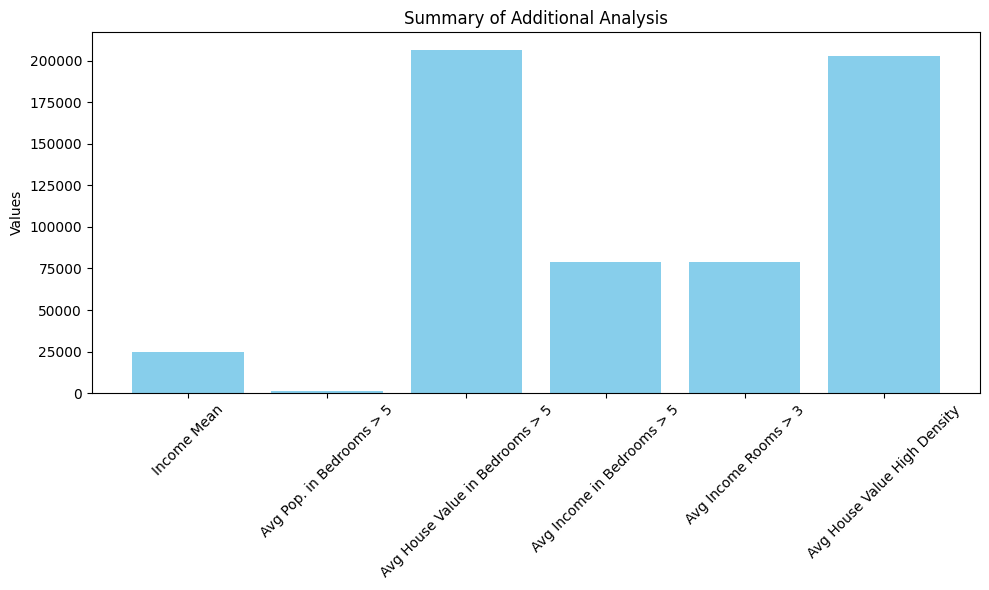

In [12]:
labels = ['Income Mean', 'Avg Pop. in Bedrooms > 5', 'Avg House Value in Bedrooms > 5',
          'Avg Income in Bedrooms > 5', 'Avg Income Rooms > 3', 'Avg House Value High Density']
values = [income_mean, population_bedrooms_gt_5, house_value_bedrooms_gt_5,
          income_bedrooms_gt_5, income_rooms_gt_3, house_value_high_density]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.title('Summary of Additional Analysis')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

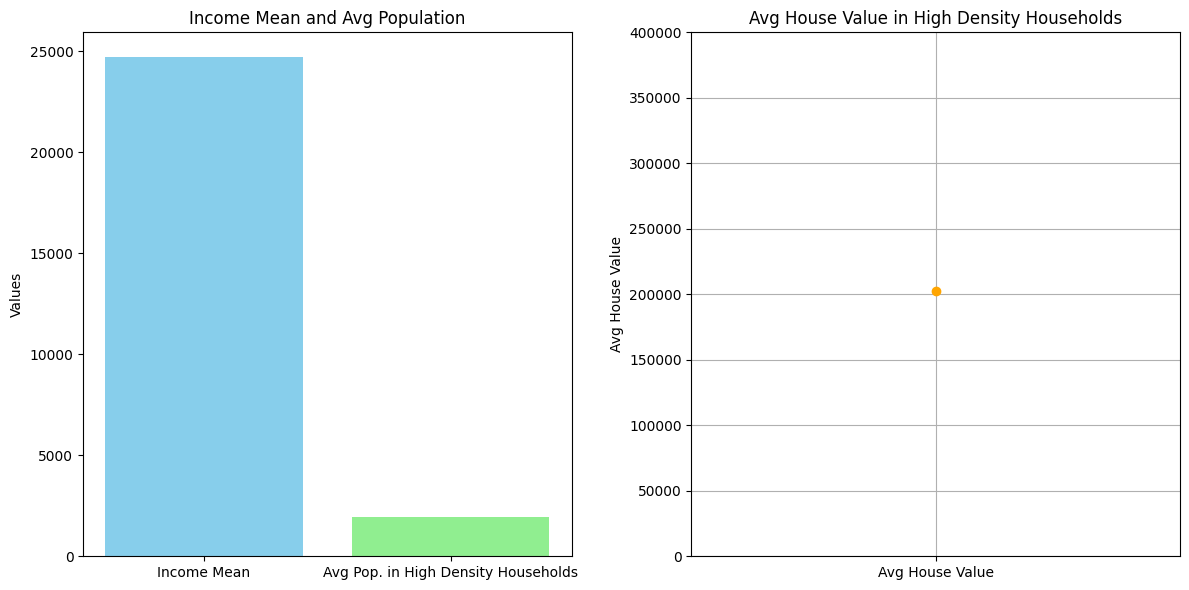

In [13]:
# Bar plot for Income Mean and Avg Pop. in High Density Households
labels = ['Income Mean', 'Avg Pop. in High Density Households']
values = [income_mean, avg_population_high_density]

plt.figure(figsize=(12, 6))

# Bar plot for Income Mean and Avg Pop.
plt.subplot(1, 2, 1)
plt.bar(labels, values, color=['skyblue', 'lightgreen'])
plt.title('Income Mean and Avg Population')
plt.ylabel('Values')

# Line plot for Avg House Value
plt.subplot(1, 2, 2)
plt.plot(['Avg House Value'], [avg_house_value_high_density], marker='o', color='orange', label='Avg House Value')
plt.title('Avg House Value in High Density Households')
plt.ylabel('Avg House Value')
plt.ylim(0, max(avg_house_value_high_density * 1.2, 400000))  
plt.grid(True)

plt.tight_layout()
plt.show()

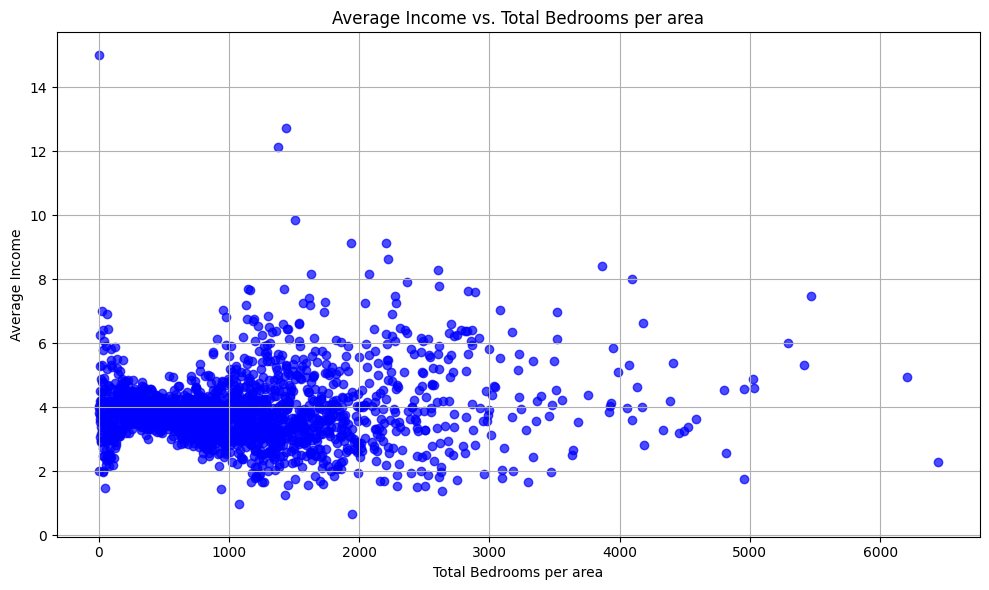

In [14]:
total_bedrooms = data[:, 4]
median_income = data[:, 7]

#average income for each total bedrooms count
# unique_bedrooms = np.unique(total_bedrooms)
# avg_income_by_bedrooms = []
# for bedrooms in unique_bedrooms:
#     avg_income = np.mean(median_income[total_bedrooms == bedrooms])
#     avg_income_by_bedrooms.append(avg_income)

unique_bedrooms, counts = np.unique(total_bedrooms, return_counts=True)
avg_income_by_bedrooms = np.zeros_like(unique_bedrooms, dtype=float)

for i, bedrooms in enumerate(unique_bedrooms):
    avg_income_by_bedrooms[i] = np.mean(median_income[total_bedrooms == bedrooms])

plt.figure(figsize=(10, 6))
plt.scatter(unique_bedrooms, avg_income_by_bedrooms, marker='o', color='blue', alpha=0.7)
plt.title('Average Income vs. Total Bedrooms per area')
plt.xlabel('Total Bedrooms per area')
plt.ylabel('Average Income')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
print(column_names)
print(data[:5, 5])

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
[ 322. 2401.  496.  558.  565.]


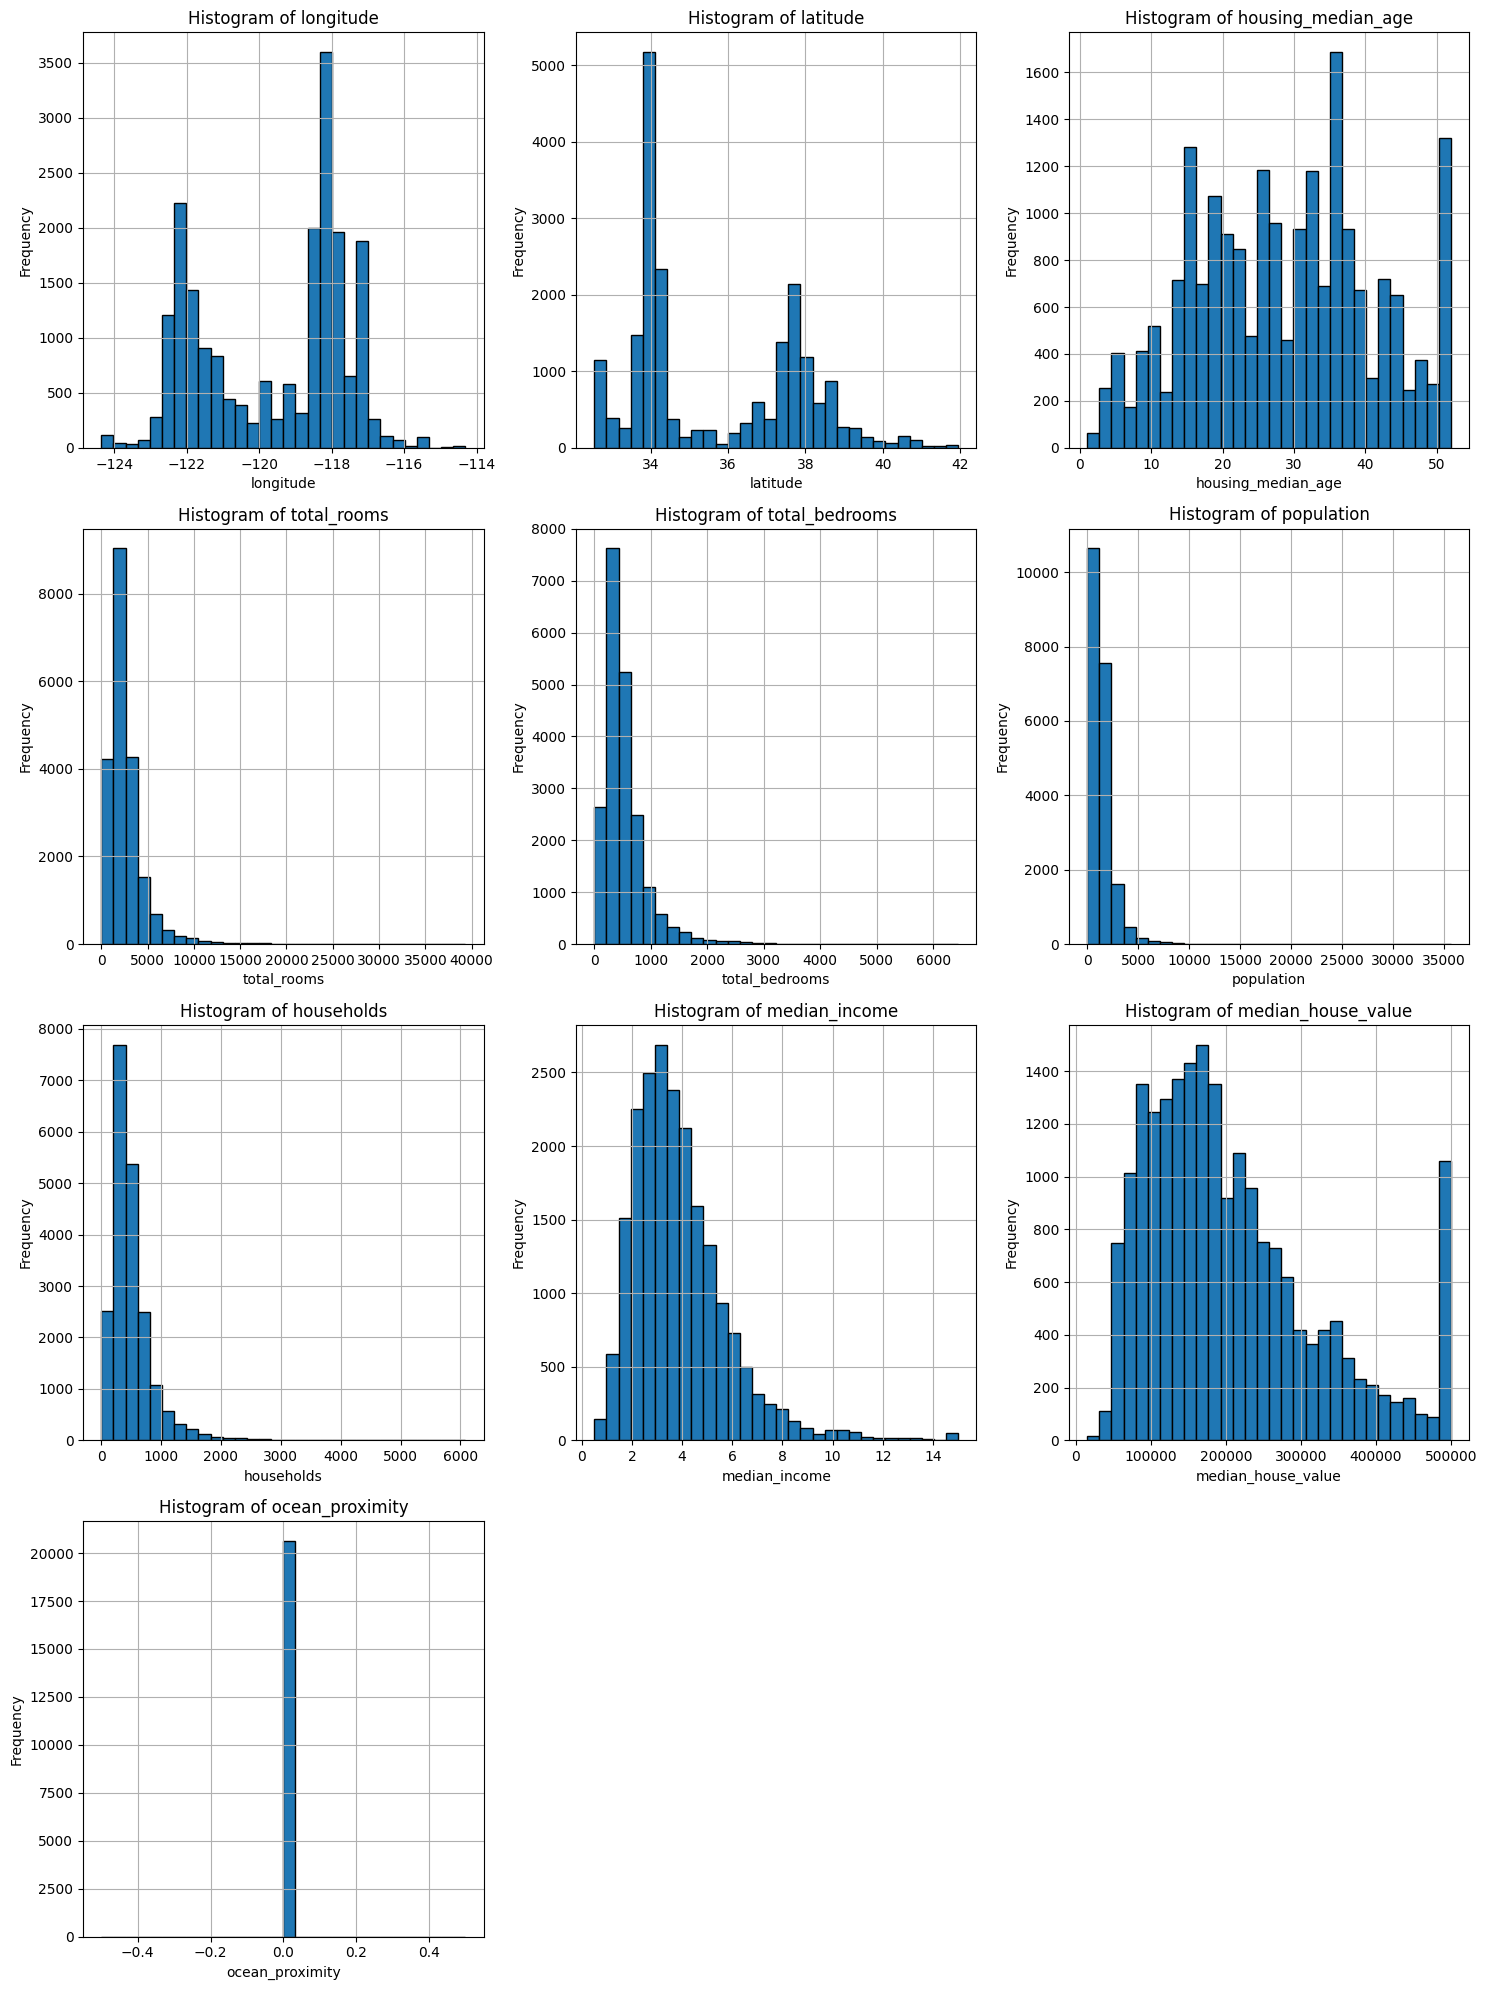

In [16]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(column_names):
    plt.subplot(len(column_names)//3 + 1, 3, i + 1)
    plt.hist(data[:, i], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()



In [17]:
print(column_names)
print(data[:, 7])

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
[8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]


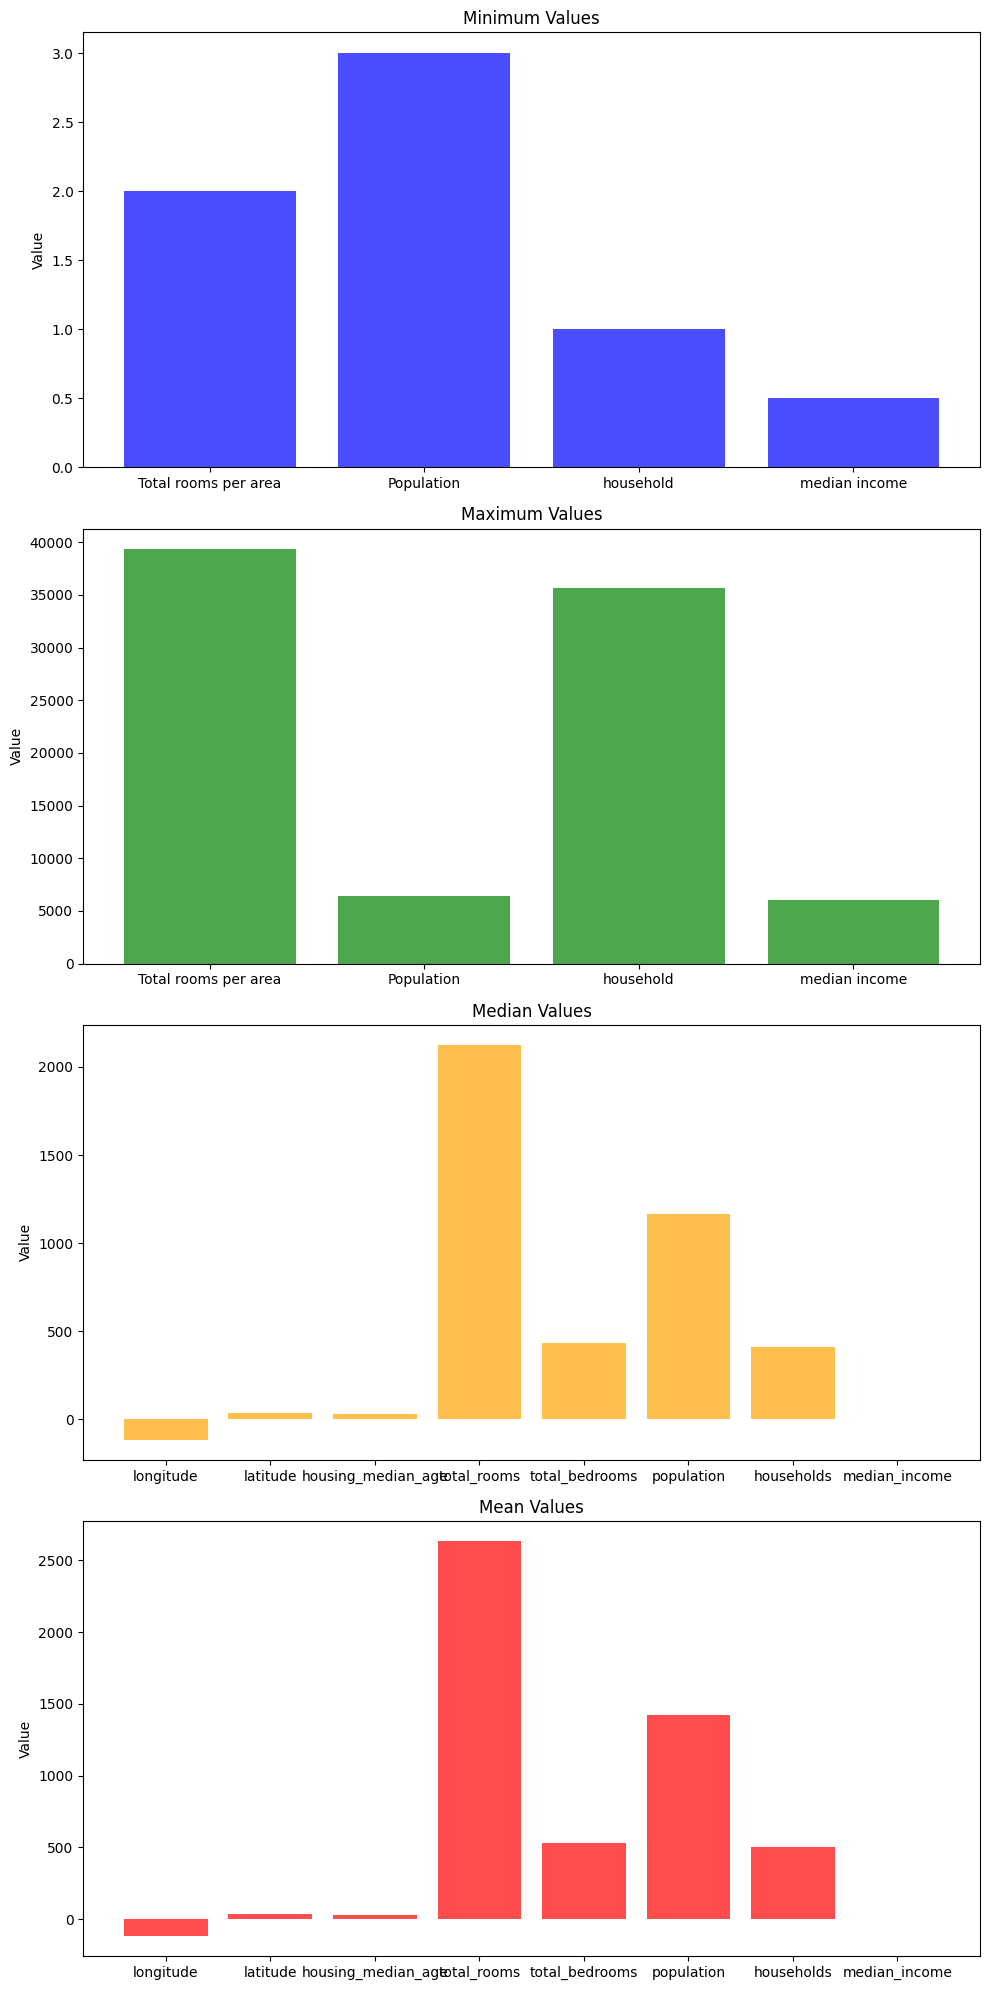

In [18]:
selected_data = data[:, [3,5,6,7]]
stats_min = np.min(selected_data, axis=0)
stats_max = np.max(data[:, [3,4,5,6]], axis=0)
stats_median = np.median(data[:, :-2], axis=0)
stats_mean = np.mean(data[:, :-2], axis=0)

fig, axs = plt.subplots(4, 1, figsize=(10, 20))

axs[0].bar(['Total rooms per area', 'Population', 'household', 'median income'], stats_min, color='blue', alpha=0.7)
axs[0].set_title('Minimum Values')
axs[0].set_ylabel('Value')

axs[1].bar(['Total rooms per area', 'Population', 'household', 'median income'], stats_max, color='green', alpha=0.7)
axs[1].set_title('Maximum Values')
axs[1].set_ylabel('Value')

axs[2].bar(column_names[:-2], stats_median, color='orange', alpha=0.7)
axs[2].set_title('Median Values')
axs[2].set_ylabel('Value')

axs[3].bar(column_names[:-2], stats_mean, color='red', alpha=0.7)
axs[3].set_title('Mean Values')
axs[3].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [19]:
print(column_names)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


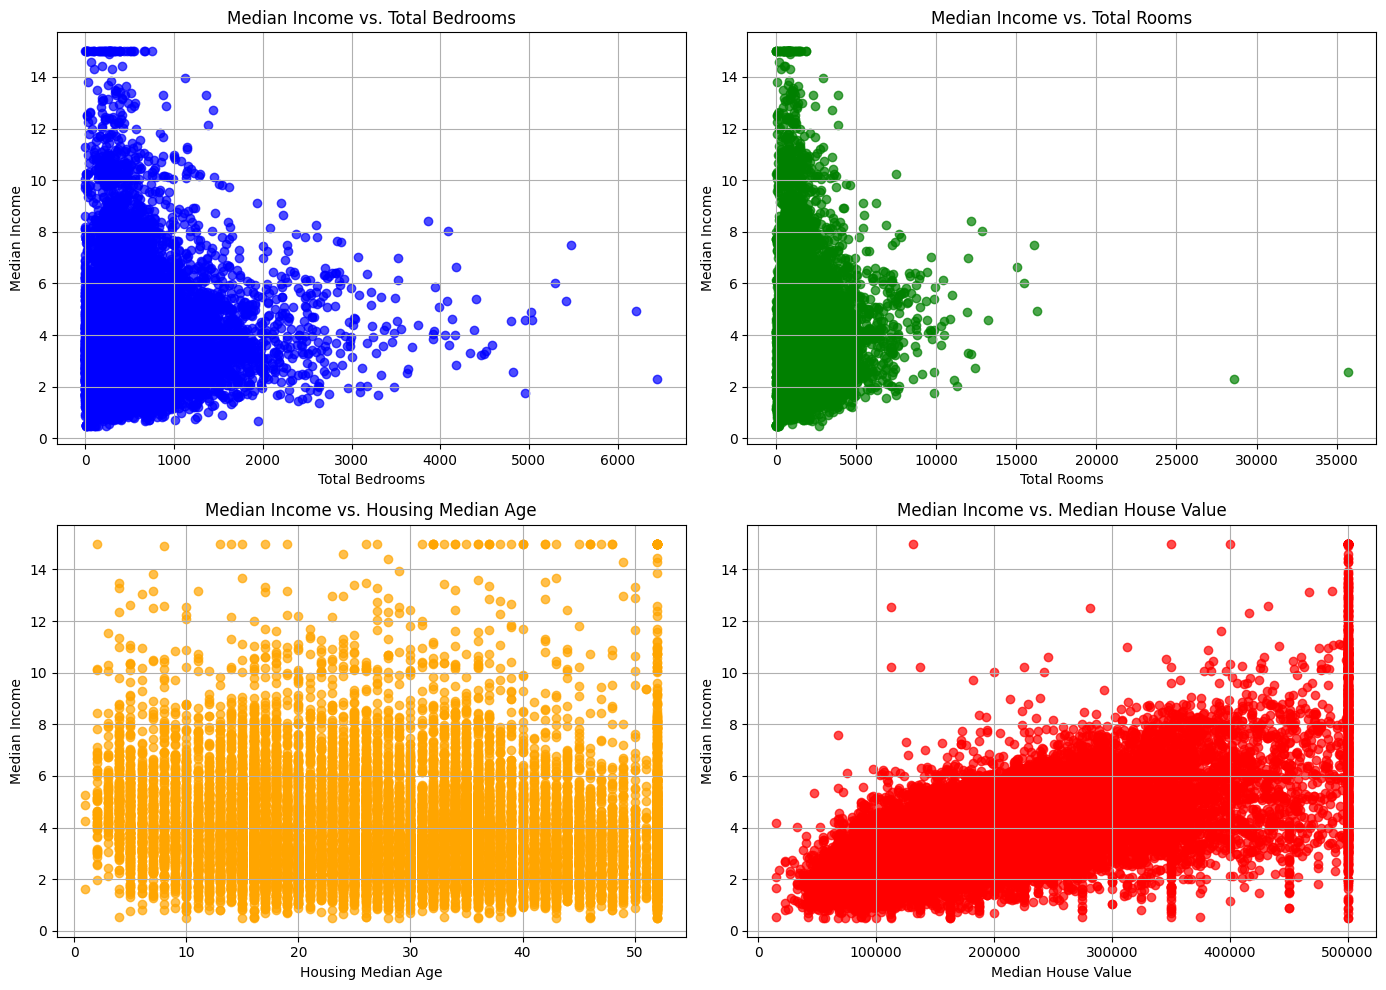

In [20]:
total_bedrooms = data[:, 4]
median_income = data[:,7]
total_rooms = data[:, 5]
housing_median_age = data[:, 2]
median_house_value = data[:, 8]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Median Income vs Total Bedrooms
axs[0, 0].scatter(total_bedrooms, median_income, marker='o', color='blue', alpha=0.7)
axs[0, 0].set_title('Median Income vs. Total Bedrooms')
axs[0, 0].set_xlabel('Total Bedrooms')
axs[0, 0].set_ylabel('Median Income')
axs[0, 0].grid(True)

# Plot 2: Median Income vs Total Rooms
axs[0, 1].scatter(total_rooms, median_income, marker='o', color='green', alpha=0.7)
axs[0, 1].set_title('Median Income vs. Total Rooms')
axs[0, 1].set_xlabel('Total Rooms')
axs[0, 1].set_ylabel('Median Income')
axs[0, 1].grid(True)

# Plot 3: Median Income vs Housing Median Age
axs[1, 0].scatter(housing_median_age, median_income, marker='o', color='orange', alpha=0.7)
axs[1, 0].set_title('Median Income vs. Housing Median Age')
axs[1, 0].set_xlabel('Housing Median Age')
axs[1, 0].set_ylabel('Median Income')
axs[1, 0].grid(True)

# Plot 4: Median Income vs Median House Value
axs[1, 1].scatter(median_house_value, median_income, marker='o', color='red', alpha=0.7)
axs[1, 1].set_title('Median Income vs. Median House Value')
axs[1, 1].set_xlabel('Median House Value')
axs[1, 1].set_ylabel('Median Income')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [21]:
np.mean(data[:,7])

3.8706710029069766

In [22]:
#boolean masking to handle outliers
data[:, 5] > 1000

array([False,  True, False, ...,  True, False,  True])

In [23]:
data[data[:, 5] > 1000] = 0

In [24]:
arr = np.arange(50).reshape(5,10)
print(arr)
print(arr[:, 5])
print(arr[:, 5] > 25)
print(arr[arr[:, 5] > 25])

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
[ 5 15 25 35 45]
[False False False  True  True]
[[30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]


In [25]:
#boolean masking 
arr = np.arange(50).reshape(5,10)
print(arr)
print(arr[:, 5])
print(arr[:, 5] > 25)
new_arr = arr[:, 5]
print(new_arr[new_arr> 25])


[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
[ 5 15 25 35 45]
[False False False  True  True]
[35 45]
